<a href="https://colab.research.google.com/github/decoz/mlclass/blob/master/3_numpy_cond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

# Numpy 조건문

Numpy 는 배열을 단순히 순차적인 인덱싱 외에도 조건값에 의한 인덱싱을 제공함으로서 다양한 연산을 가능하게 한다. 

## 배열의 비교연산

기본 원리는 배열에 참과 거짓값으로 이뤄진 배열을 입력하여 참인 부분에 해당하는 원소만을 억세스 할 수 있도록 제공한다. 

In [ ]:
x = np.arange(3)
print( x[[True, False, True]])


행렬에 비교연산을 수행 시 참과 거짓으로 이뤄진 배열을 얻어낼 수 있다.  다음은 x 의 짝여부를 조건으로 연산한 결과이다. 

In [ ]:
print(x % 2 == 0)

이러한 조건을 x 에 배열의 인덱스값으로 입력하게 됨으로서 결과적으로 배열에 특정 조건을 만족시키는 원소를 포함하는 배열을 추출 할 수 있다. 

In [ ]:
print(x[ x % 2 == 0])

## Logical OR, And, Not 연산

Numpy 배열은 and, or, not 연산을 지원하지 안는다. 

In [ ]:
x1,x2 = np.array([True, False]), np.array([True, True])
print(x1 or x2) # 에러발생


이를 해결하기 위해선 numpy에서 제공하는 논리연산인  함수를 사용하거나 따로 연산기호 &, |, ~ 를 사용하여야 한다. 

In [ ]:
print( np.logical_and(x1, x2))

이 때 사용되는 함수는 다음과 같다. 

```
logical_or : or 연산  ( | ) 
logical_and  : and 연산 ( & )
logical_not : not 연산 ( ~ ) 
```


In [ ]:
x1,x2 = np.array([True, False]), np.array([True, True])
print( x1 & x2 )
print( x1 | x2 )
print( ~x1 )

### 예: 다중 조건 사용

다음 코드는 0 ~ 9 까지 2와 3의 배수를 추출하는 코드이다. 

In [ ]:
 x = np.arange(10)
 print(  x[ np.logical_or( x % 2 == 0 , x % 3 == 0 )] )

이는 이중배열에도 적용된다.  아래는 2차원 배열의 0,3,6,9 번째 줄에 0을 입력하는 코드이다. 

In [ ]:

x[x%10%3 == 0] = 0 
print(x)

### <font color = 'red'> 연습문제 : 배열의 조건부 대입

다음과 같은 배열을 만들어보세요
</font>
```
[[ 0  0  2  3  0  5  6  0  8  9]
 [ 0  0  0  0  0  0  0  0  0  0]
 [20  0 22 23  0 25 26  0 28 29]
 [30  0 32 33  0 35 36  0 38 39]
 [ 0  0  0  0  0  0  0  0  0  0]
 [50  0 52 53  0 55 56  0 58 59]
 [60  0 62 63  0 65 66  0 68 69]
 [ 0  0  0  0  0  0  0  0  0  0]
 [80  0 82 83  0 85 86  0 88 89]
 [90  0 92 93  0 95 96  0 98 99]]
 ```

In [ ]:
arr = np.arange(100).reshape(10,10)
# 연습문제의 풀이를 작성하세요


print(arr)


## where 함수

단순히 조건문으로 해결하기 어려운 경우에는 np.where 을 사용함으로서 더 복잡한 작업이 가능하다. where 함수는 조건에 맞을 경우와 틀릴 경우 두가지 값으로 구성된 배열을 리턴한다. 

```
where(조건 , 참인경우의 값, 거짓인 경우의 값) 
```

다음의 where 은  arr 중에 3보다 크면 1 작으면 0의 값을 리턴한다. 


In [ ]:
arr = np.array([1,2,3,4,5])
np.where(arr > 3 , 1, 0 )


고정 값만이 아니라 다른 배열 값을 사용 할 수도 있다. 아래의 코드는 [0,1,2,3,4] 순차배열인 x 배열에 조건을 사용하여 arr 의 짝수번째 값만 0으로 바꾼 arr 을 리턴한다.

In [ ]:
arr = np.array([10,5,3,9,1])
x = np.arange(5)
np.where( x % 2 == 0 , arr , 0)


(n,1) 배열과 (1,m) 크기의 배열을 연산하여 행렬곱 연산을 사용하는 경우 이는 더욱 다양한 형태의 배열값을 다룰 수 있다. 

아래의 ogrid 는 3 x 4 의 격자의 축을 각각 x, y 배열로 리턴한다. 

In [ ]:
x, y = np.ogrid[:3, :4]  # x,y = range(3).reshpae(3,1), range(4) 와 같은 뜻
print(x, y , sep = "\n")

이 두배열을 조건 연산으로 사용할 경우 자동적으로 (3,4) 의 배열이 구성되면서 조건이 적용된다. 아래는 이를 이용해 대각선 값만 억세스할 수 있음을 보여준다. 

In [ ]:
np.where(x == y, 1, 0)

아래는 위의 응용으로 10x10 의 대각선에 순차값을 넣는 예이다. 

In [ ]:
x,y = np.ogrid[:10, :10]
np.where(x == y , y , 0)

### <font color = 'red'> 연습문제 : 다음과 같은 배열을 만들어보세요

다음과 같은 배열을 만들어보세요
</font>
```
[[ 0  0  2  0  4  0  6  0  8  0]
 [ 0 11  0 13  0 15  0 17  0 19]
 [20  0 22  0 24  0 26  0 28  0]
 [ 0 31  0 33  0 35  0 37  0 39]
 [40  0 42  0 44  0 46  0 48  0]
 [ 0 51  0 53  0 55  0 57  0 59]
 [60  0 62  0 64  0 66  0 68  0]
 [ 0 71  0 73  0 75  0 77  0 79]
 [80  0 82  0 84  0 86  0 88  0]
 [ 0 91  0 93  0 95  0 97  0 99]]
 ```

In [ ]:
# 연습문제의 풀이를 작성하세요



<br>
<hr style="height:3px">

#Numpy 변환

reshape 가 배열의 순서를 유지하는 상태에서 배열의 형태만 유지한다면 아예 새로운 배열로 변환하는 방법이 있다.  


## append

np.append 는 두개의 1차원 배열을 합칠 수 있다. 

- np.append( 배열1, 배열2 ) 

다차원 배열의 경우 append 는 이를 모두 1차원 배열로 변형하여 합친다. 

In [ ]:
narr1 = np.array([1,2,3])
narr2 = np.array([4,5])
print( np.append(narr1, narr2) )

In [ ]:
narr1 = np.array([[1,2],[3,4]])
narr2 = np.array([[5,6,7]])
print( np.append(narr1, narr2 ) )

## concatenate

np 는 concatenate 를 이용하여 다차원 배열의 병합이 가능하다. 

- concatenate( (배열1, 배열2, ..  ) , axis=병합차원 ) 

axis 는  [[1,2]] 과 [[3,4]] 의 병합시

0 일때 [[1,2], [3,4]] 가 되며 

1 일때 [[1,2,3,4]] 가 된다. 


In [ ]:
# 아래의 예제의 결과를 통해 axis 가 어떻게 영향을 주는지 잘 생각해보자. 
narr1 = np.array([[1,2],[3,4]])
narr2 = np.array([[5,6],[7,8]])
print( "axis = 0 : \n", np.concatenate( ( narr1, narr2),  axis=0) )
print( "axis = 1 : \n", np.concatenate( ( narr1, narr2),  axis=1) )


편의를 위해 axis = 0 인경우를 대신해 vstack 이라는 함수를 axis = 1 인 경우에는 hstack 이라는 함수를 사용하기도 한다. 


## c_, r_

또한 간략한 버젼으로 c_, r_ 을 사용한다.  존재한다. r_ 은 axis=0 의 병합을, c_ 는 axis=-1 의 병합을 지원한다. 


In [ ]:
x1 = np.array([[1,2],[3,4]])
x2 = np.array([[5,6],[7,8]])

print( np.c_[x1, x2] ) # 행으로 병합
print( np.r_[x1, x2] ) # 열로 병합

아래는 위의 예를 이미지에 응용한 것으로 r_ 을 사용하여 이미지를 위 아래로 병합한 예를 보여준다. 

In [ ]:
img1 = np.full((50,50,3),[255,0,0])
img2 = np.full((50,50,3),[0,0,255])


plt.imshow(np.r_[img1, img2])
plt.show()

단 두 컬러 이미지를 옆으로 붙일때는 c_ 를 사용하면 되겠다고 생각하기 쉽지만 c_ 는 두 배열의 가장 마지막축을 기준으로 붙인다.  (50,50,3) 배열 둘을 c_ 로 붙이면 
(50,100,3) 이 아니라 (50,50,6) 이 되므로 이미지 자체가 깨지게 된다.  이 경우는 concatenate 를 사용해서 두번째 축을 기준으로 붙여야 한다. 

In [ ]:
plt.imshow(  np.concatenate((img1,img2), axis = 1) )


## stack 

stack 은 배열을 다시 또 하나의 배열로 묶는다.  이는 배열의 차원의 증가를 동반한다. 

In [ ]:
np.stack( [ np.array([1,2]), np.array([3,4]) ] )


다음은 concatenate 와의 차이를 보여준다.


In [ ]:
x,y = np.array([[1,2],[3,4]]), np.array([[5,6],[7,8]])
print("stack result:")
print( np.stack([x,y], axis = 0))
print("concatenate result:")
print( np.concatenate([x,y], axis = 0))



### <font color = 'red'> 연습문제 : 두 분포 데이터 합치기 
다음 두 점의 그룹 (x1,y1) 과 (x2,y2) 를 하나의 그룹으로 만드세요
</font>

In [ ]:
#10,10 을 중심으로 분포하는 100개의 점
x1,y1 = np.random.normal(10,5,100), np.random.normal(10,5,100)
plt.plot(x1,y1,'.')

#70,50 을 중심으로 분포하는 100개의 점
x2,y2 = np.random.normal(70,5,100), np.random.normal(50,5,100)
plt.plot(x2,y2,'.')

plt.xlim(0,100) # x 축 표시 범위: 0~100
plt.ylim(0,100) # y 축 표시 범위: 0~100 

plt.show()

# 연습문제 풀이코드를 여기에 작성해서 두 군집 배열을 합쳐서 하나의 x와 y로 만드세요


## swap

swap 은 배열의 축의 순서를 서로 변경할 수 있다. (n,m) 의 형태를 가진 데이터가 있을 경우 이를 (m,n) 의 형태로 교체해준다. 이때 n 은 0번째 축 ( axis=0 ) , m 은 1번째 축 ( axis=1 ) 이기 때문에 다음과 같이 두 축을 서로 교환할 수 있다. 


In [ ]:
narr = np.arange(8).reshape(2,4)
print(narr)
print( np.swapaxes(narr, 0, 1) )  # narr 의 0번과 1번 축을 서로 교환


## flip

flip 은 배열의 순서를 뒤집을 수 있다.  
```
narr = np.array([1,2,3])
print( np.flip(narr) )

-> [3,2,1] 
```

다차원 배열일 경우 axis = ? 의 파라미터를 이용해 어느 축을 기준으로 역순배열을 만들 것인지 결정된다.  만일 axis 가 주어지지 안을 경우 모든 축을 역순으로 배치한다. 



In [ ]:
narr = np.arange(8).reshape(2,4)
print(narr)
print("\nflip by axis 0 ")
print( np.flip(narr,axis=0) )  # narr 의 세로(0번)축을 기준으로 반전
print("\nflip by axis 1 ")
print( np.flip(narr,axis=1) )  # narr 의 가로(1번)축을 기준으로 반전
print("\nflip without axis ")
print( np.flip(narr) )  # narr 의 모든 축을 반전

또 하나의 배열 역전 방법은 ::-1 표기를 사용하는 것이다. 

```
narr = np.array([1,2,3])
print( narr[::-1] ) )
->
[3,2,1]
```
이 방법은 여러 축중에 특정 축들을 동시에 역전시킬 수도 있다. 


In [ ]:
narr = np.array([[1,2],[3,4]])
print(narr[::-1,::-1]) # axis 0 과 1을 동시에 역전시킴

In [ ]:
narr = np.array([[1,2],[3,4]])
print(np.flip(narr, axis = 0))
print(narr[::-1,:])

print(narr)

### <font color = 'red'> 연습문제 2-6 : 2차원 배열 시계방향 회전 
0~8까지 3x3 배열을 다음과 같이 변환해보자. </font>
```
[[0 1 2]
 [3 4 5]
 [6 7 8]]

->
[[6 3 0]
 [7 4 1]
 [8 5 2]]
```

In [ ]:
narr = np.arange(9).reshape(3,3)

# 연습문제 2-6 의 코드를 작성하세요


print(narr)

### <font color = 'red'> 연습문제 2-7 : 다음과 같은 형태의 데이터를 생성해보자 

0 ~ 1 사이의 10개의 x 점의 x*x 의 그래프를 생성하는 다음의 코드가 생성하는 이미지는 다음과 같다. 
</font>
```
x = np.linspace(0,1,10)
y = x * x

plt.plot( x,y )
plt.show()
```

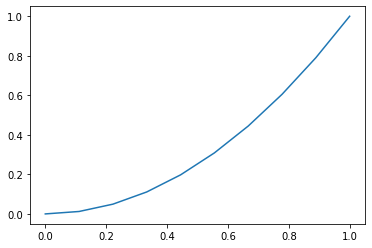

<font color = 'red'> 이 배열을 이용해 다음과 같은 형태의 이미지를 생성해보자 </font>

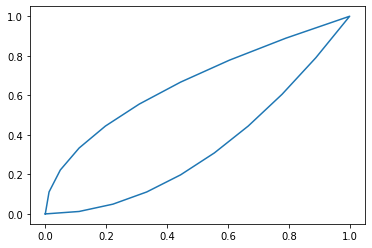

In [ ]:
# y = x*x 인 2차원 곡선
x = np.linspace(0,1,10)
y = x * x
 
plt.plot( x,y )
plt.show()

## d연습문제 2-7의 코드를 작성해보자. 

### <font color = 'red'> 연습문제 2-8 : 격자 패턴 생성 

0~8까지 3x3 의 정방형 데이터가 가로 세로 3x3 으로 모인 9x9 데이터를 만드는 방법을 생각해보자.
</font>

``` 
[[0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]
 [6 7 8 6 7 8 6 7 8]
 [0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]
 [6 7 8 6 7 8 6 7 8]
 [0 1 2 0 1 2 0 1 2]
 [3 4 5 3 4 5 3 4 5]
 [6 7 8 6 7 8 6 7 8]]
```

In [ ]:
# 연습문제 2-8의 코드를 여기에 생성해보자